In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

K Nearest Neighbors
------------------------------------------------

The first method we'll look at is called K Nearest Neighbors. It sounds similar to K means, but don't confuse them just because their name sounds the same.

The principle behind nearest neighbor methods is to find a predefined number of training samples, *k*, closest in distance to the new point, and predict the label from these. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.

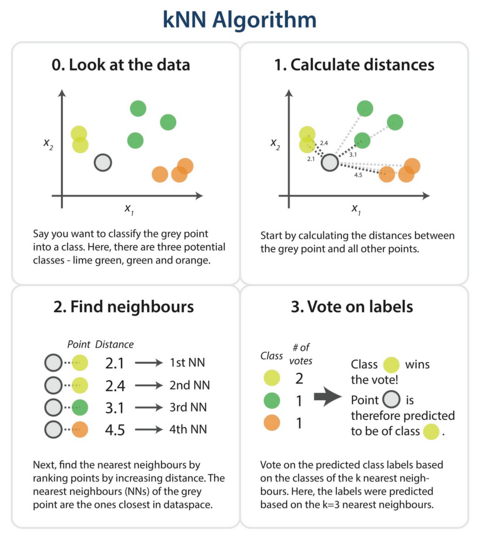

Source: [https://www.datasciencecentral.com/]

## Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

knn.fit(X_train, y_train);

In [ ]:
from figures import plot_2d_separator
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [ ]:
knn.score(X_test, y_test)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_iris_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test classification change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the classification change.
      </li>
    </ul>
</div>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

k = 4

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.25)

knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('k: %d, Train Acc: %.3f, Test Acc: %.3f' % (k, train_score, test_score))

train_labels = knn.predict(X_train)
test_labels = knn.predict(X_test)

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title("Real labels [train]")
plt.subplot(2, 2, 2)
plt.scatter(X_train[:,0], X_train[:,1], c=train_labels)
plt.title("KNN [train]")
plt.subplot(2, 2, 3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("Real labels [test]")
plt.subplot(2, 2, 4)
plt.scatter(X_test[:,0], X_test[:,1], c=test_labels)
plt.title("KNN [test]");

## Regression

K nearest neighbors can be easily used in regression as well. This time, instead of voting on a class label based on nearest neighbors, the output value will be the average of the outputs of the *k* nearest neighbors. Here is an example using Airbnb data:

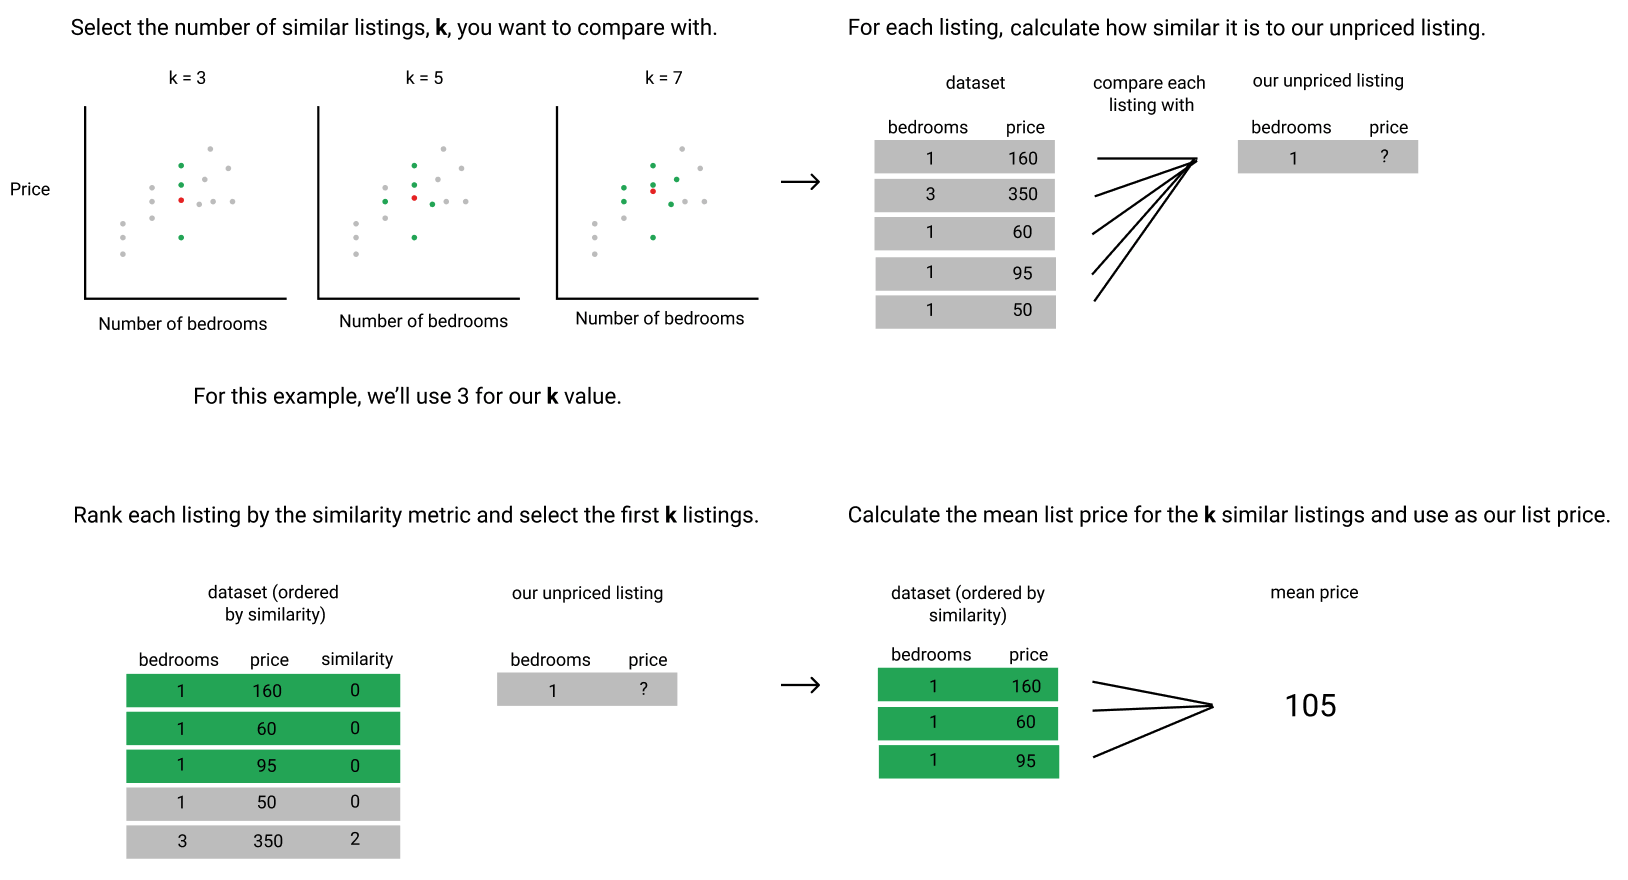

Source: [https://www.dataquest.io]

Let's generate some data based on a ``sin`` curve and see how well K nearest neighbors does.

In [ ]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

k = 5

X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [ ]:
y_pred_test = knn.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [ ]:
knn.score(X_test, y_test)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_diabetes_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test accuracy change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the accuracy change.
      </li>
    </ul>
</div>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

k = 10

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.25)

knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('k: %d, Train Acc: %.3f, Test Acc: %.3f' % (k, train_score, test_score))

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

x_axis = 3

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(X_train[:, x_axis], y_train, 'o', label="data", markersize=10)
plt.plot(X_train[:, x_axis], y_pred_train, 's', label="prediction", markersize=4)
plt.title("KNN [train]")
plt.subplot(1, 2, 2)
plt.plot(X_test[:, x_axis], y_test, 'o', label="data", markersize=10)
plt.plot(X_test[:, x_axis], y_pred_test, 's', label="prediction", markersize=4)
plt.title("KNN [test]");